# Imports

In [2]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

import easygui

# Dataset importing

In [5]:
df = pd.read_csv("SaYoPillow.csv")

# Exploratory Data Analysis

In [3]:
print("Output of df.head(10)\n", df.head(10), "\n")
print("Output of df.info()\n", df.info(), "\n")
print("Output of df.describe()\n", df.describe())

Output of df.head(10)
       sr      rr       t      lm      bo    rem   sr.1     hr  sl
0  93.80  25.680  91.840  16.600  89.840  99.60  1.840  74.20   3
1  91.64  25.104  91.552  15.880  89.552  98.88  1.552  72.76   3
2  60.00  20.000  96.000  10.000  95.000  85.00  7.000  60.00   1
3  85.76  23.536  90.768  13.920  88.768  96.92  0.768  68.84   3
4  48.12  17.248  97.872   6.496  96.248  72.48  8.248  53.12   0
5  56.88  19.376  95.376   9.376  94.064  83.44  6.376  58.44   1
6  47.00  16.800  97.200   5.600  95.800  68.00  7.800  52.00   0
7  50.00  18.000  99.000   8.000  97.000  80.00  9.000  55.00   0
8  45.28  16.112  96.168   4.224  95.112  61.12  7.112  50.28   0
9  55.52  19.104  95.104   9.104  93.656  82.76  6.104  57.76   1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float

# Data Visualisation

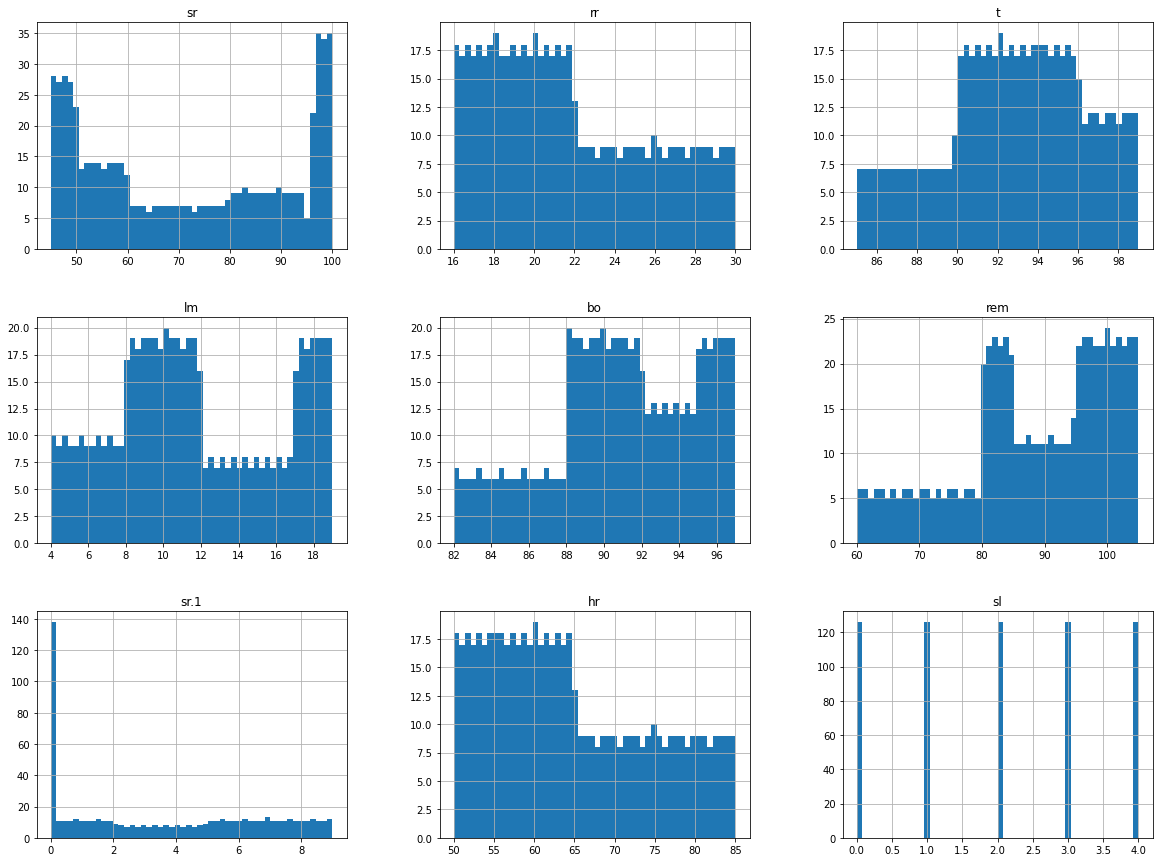

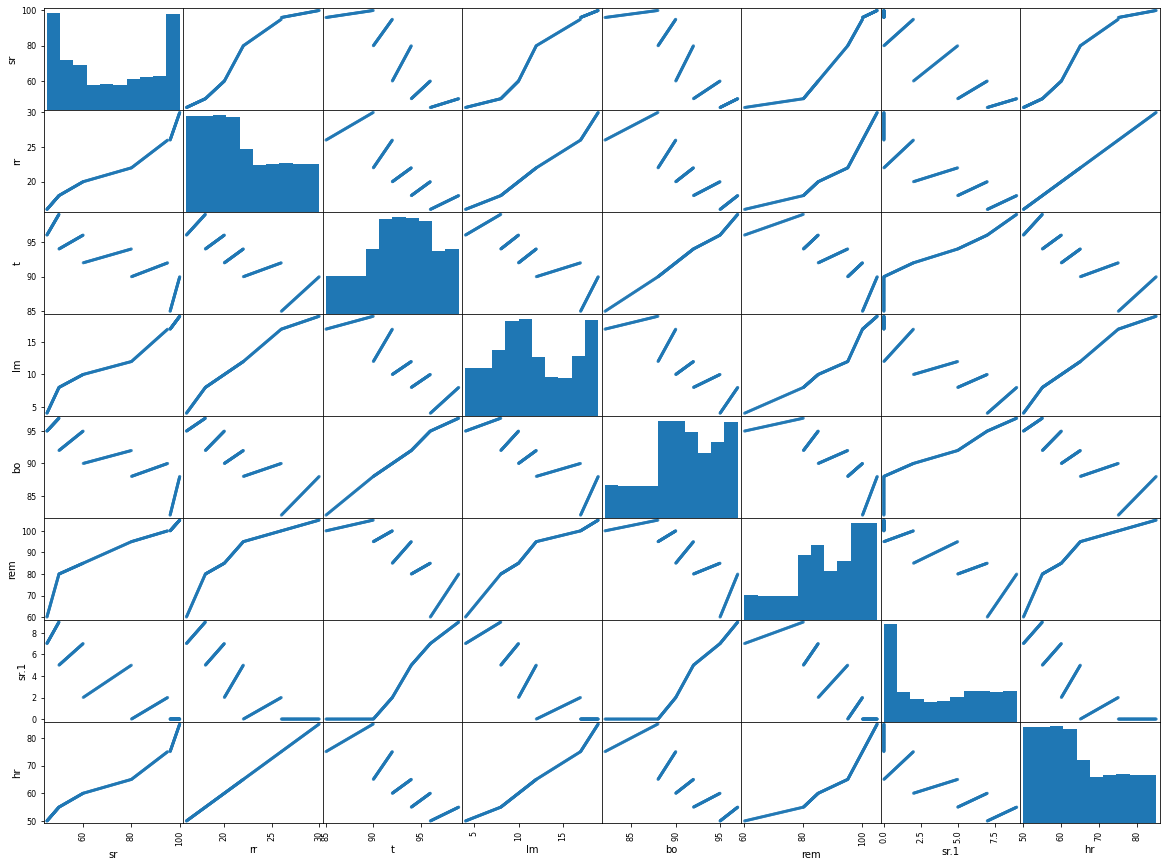

In [4]:
df.hist(figsize = (20, 15), bins = 50);
scatter_matrix(df[["sr", "rr", "t", "lm", "bo", "rem", "sr.1", "hr"]], figsize = (20,15));

# Train Test splitting

In [6]:
train_set, test_set = train_test_split(df, test_size=0.30, random_state=42)

# Separating features and labels and standardising data

In [7]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_set.drop(columns = "sl"))
test_features = scaler.transform(test_set.drop(columns = "sl"))
train_label = train_set["sl"].copy()
test_label = test_set["sl"].copy()

# Creating a neural network

In [11]:
model = Sequential()
model.add(Dense(8, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(5, activation = "softmax"))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(train_features, train_label, epochs = 17, shuffle = True, validation_data = (test_features, test_label));
print(model.summary(), "\n\n")

Epoch 1/17
14/14 [==============================] - 1s 28ms/step - loss: 1.6950 - accuracy: 0.3197 - val_loss: 1.6059 - val_accuracy: 0.3175
Epoch 2/17
14/14 [==============================] - 0s 12ms/step - loss: 1.6013 - accuracy: 0.3309 - val_loss: 1.5221 - val_accuracy: 0.3228
Epoch 3/17
14/14 [==============================] - 0s 15ms/step - loss: 1.4995 - accuracy: 0.2984 - val_loss: 1.4554 - val_accuracy: 0.2910
Epoch 4/17
14/14 [==============================] - 0s 13ms/step - loss: 1.4559 - accuracy: 0.2614 - val_loss: 1.3987 - val_accuracy: 0.3016
Epoch 5/17
14/14 [==============================] - 0s 15ms/step - loss: 1.3966 - accuracy: 0.2808 - val_loss: 1.3452 - val_accuracy: 0.3175
Epoch 6/17
14/14 [==============================] - 0s 10ms/step - loss: 1.3446 - accuracy: 0.3103 - val_loss: 1.2918 - val_accuracy: 0.3492
Epoch 7/17
14/14 [==============================] - 0s 14ms/step - loss: 1.2463 - accuracy: 0.3883 - val_loss: 1.2418 - val_accuracy: 0.5132
Epoch 8/17
14

# Saving the model to later load with keras

In [14]:
model.save("stress_detection_savedmodel");
model.save("stress_detection.h5")

INFO:tensorflow:Assets written to: stress_detection_savedmodel/assets


In [3]:
temp_model = load_model("stress_detection.h5")
temp_model.summary();
print("\n\n")
temp_model_1 = load_model("stress_detection_savedmodel")
temp_model_1.summary();

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 85        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 16)                144       
_______________________________

# Predicting the result

In [8]:
result = np.argmax(temp_model.predict(scaler.transform([[63.68, 20.368, 92.368, 10.368, 90.368, 86.84, 2.552, 60.92]])))
print(result)

2
